# DATA UNDERSTANDING

## Context

Sebuah toko rental dvd yang berlokasi di Australia dan Canada ingin mengetahui gambaran umum tentang bisnis yang selama ini sedang mereka jalankan. Terdapat sebuah database yang menunjukkan detail dari toko, staff, dan customer beserta transaksi. Dari database tersebut, pemilik toko ingin menampilkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.

## Database Information

Sumber Database : https://dev.mysql.com/doc/sakila/en/sakila-installation.html

Database yang dimiliki mempunyai 23 tabel, yaitu:
- actor : Berisi informasi tentang nama aktor
- actor_info : Berisi informasi tentang nama aktor beserta film yang diperankan
- address : Berisi informasi tentang detail alamat dari customer
- category : Berisi informasi tentang kategori film
- city : Berisi informasi tentang kota asal dari customer
- country : Berisi informasi tentang negara asal dari customer
- customer : Berisi informasi umum tentang customer
- customer_list : Berisi informasi detail tentang customer
- film : Berisi informasi detail tentang film
- film_actor : Berisi informasi tentang id aktor beserta film yang dimainkan
- film_category : Berisi informasi tentang id film beserta kategorinya
- film_list : Berisi informasi umum tentang film
- film_text : Berisi informasi tentang deskripsi singkat dari film tersebut
- inventory : Berisi informasi tentang jumlah stok film pada tiap toko
- language : Berisi informasi tentang list bahasa yang digunakan pada film tersebut
- nicer_but_slower_film_list : Berisi informasi umum tentang film
- payment : Berisi informasi tentang pembayaran oleh customer
- rental : Berisi informasi tentang waktu peminjaman dan pengembalian dvd oleh customer
- sales_by_film_category : Berisi informasi total penjualan berdasarkan kategori film
- sales_by_store : Berisi informasi total penjualan di setiap toko
- staff : Berisi informasi tentang detail dari staff di setiap toko
- staff_list : Berisi informasi umum tentang staff di setiap toko
- store : Berisi informasi tentang toko

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# DATABASE

## Connecting To Database

Bagian ini merupakan langkah awal untuk mulai melakukan proses melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database sakila. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [1]:
# Load library
import mysql.connector
import pandas as pd
import numpy as np

In [2]:
# Connect to database

mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "nissan350z",
    database = "sakila"
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan query yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil query yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 4 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [3]:
# Query function

curs = mydb.cursor()

def sql_table(query):
    curs.execute(query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## Data Customer & Transaksi

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 3 tabel, yaitu tabel customer_list, customer, dan rental. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah:
- ID dari tabel customer_list
- first_name dari tabel customer
- last_name dari tabel customer
- email dari tabel customer
- address dari tabel customer_list
- phone dari tabel customer_list
- city dari tabel customer_list
- country dari tabel customer_list
- notes dari tabel customer_list
- SID dari tabel customer_list

Selain dari tabel, terdapat sebuah kolom yang dinamakan total_transaction yang merupakan jumlah transaksi pada tiap customer yang merupakan hasil aggregating dari kolom customer_id pada tabel rental. Semua informasi tersebut kemudian dijadikan dalam sebuah dataframe yang nantinya akan diolah informasinya

In [4]:
df = sql_table(
    '''
    select cl.ID, c.first_name, c.last_name, lcase(c.email) email, cl.address, cl.phone, cl.city, cl.country, cl.notes, cl.SID, count(r.customer_id) total_transaction
from customer_list cl
left join customer c on (cl.ID = c.customer_id)
left join rental r on (cl.ID = r.customer_id)
group by ID;
    '''
)
df.head()

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction
0,1,MARY,SMITH,mary.smith@sakilacustomer.org,1913 Hanoi Way,28303384290,Sasebo,Japan,active,1,32
1,2,PATRICIA,JOHNSON,patricia.johnson@sakilacustomer.org,1121 Loja Avenue,838635286649,San Bernardino,United States,active,1,27
2,3,LINDA,WILLIAMS,linda.williams@sakilacustomer.org,692 Joliet Street,448477190408,Athenai,Greece,active,1,26
3,4,BARBARA,JONES,barbara.jones@sakilacustomer.org,1566 Inegl Manor,705814003527,Myingyan,Myanmar,active,2,22
4,5,ELIZABETH,BROWN,elizabeth.brown@sakilacustomer.org,53 Idfu Parkway,10655648674,Nantou,Taiwan,active,1,38


## Data Detail Status Customer

Data kedua ini merupakan data tambahan dimana untuk melihat gambaran tentang data yang dimiliki. Data ini memuat jumlah customer yang aktif dan tidak aktif, dimana angka 1 mewakili customer yang aktif dan angka 0 mewakili customer yang tidak aktif.

In [5]:
active_table = sql_table(
    '''
    select active, count(active) total from customer
    group by active;
    '''
)
active_table.head()

,active,total
0,1,584
1,0,15


## Data Total Customer Berdasarkan Negaranya

Data yang ketiga ini merupakan data tambahan yang menampilkan jumlah total customer di tiap negaranya. Pada data ini diharapkan perusahaan/toko dapat menemukan strategi yang tepat agar dapat memperoleh lebih banyak lagi customer sehingga nantinya akan menghasilkan keuntungan yang lebih dari saat ini.

In [6]:
country_table = sql_table(
    '''
    select country, count(country) total_customer
from customer_list
group by country
order by count(country) desc
limit 10;
    '''
)
country_table

,country,total_customer
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
5,Brazil,28
6,Russian Federation,28
7,Philippines,20
8,Turkey,15
9,Indonesia,14


# Data Manipulation



Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada df. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## Feature Total Bill

Sebelum mengecek informasi serta anomali pada data, disini kita akan membuat sebuah kolom tambahan yang diberi nama total_bill. Pada kolom ini memuat informasi jumlah seluruh total pembayaran yang dilakukan oleh customer. Nantinya kolom ini akan digunakan sebagai perbandingan total penghasilan antara customer yang aktif dan tidak aktif.

In [7]:
pay = sql_table(
    '''
    select sum(amount) amount from payment
    group by customer_id
    '''
)
pay
df['total_bill'] = pay['amount']
df.head(20)

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction,total_bill
0,1,MARY,SMITH,mary.smith@sakilacustomer.org,1913 Hanoi Way,28303384290,Sasebo,Japan,active,1,32,118.68
1,2,PATRICIA,JOHNSON,patricia.johnson@sakilacustomer.org,1121 Loja Avenue,838635286649,San Bernardino,United States,active,1,27,128.73
2,3,LINDA,WILLIAMS,linda.williams@sakilacustomer.org,692 Joliet Street,448477190408,Athenai,Greece,active,1,26,135.74
3,4,BARBARA,JONES,barbara.jones@sakilacustomer.org,1566 Inegl Manor,705814003527,Myingyan,Myanmar,active,2,22,81.78
4,5,ELIZABETH,BROWN,elizabeth.brown@sakilacustomer.org,53 Idfu Parkway,10655648674,Nantou,Taiwan,active,1,38,144.62
5,6,JENNIFER,DAVIS,jennifer.davis@sakilacustomer.org,1795 Santiago de Compostela Way,860452626434,Laredo,United States,active,2,28,93.72
6,7,MARIA,MILLER,maria.miller@sakilacustomer.org,900 Santiago de Compostela Parkway,716571220373,Kragujevac,Yugoslavia,active,1,33,151.67
7,8,SUSAN,WILSON,susan.wilson@sakilacustomer.org,478 Joliet Way,657282285970,Hamilton,New Zealand,active,2,24,92.76
8,9,MARGARET,MOORE,margaret.moore@sakilacustomer.org,613 Korolev Drive,380657522649,Masqat,Oman,active,2,23,89.77
9,10,DOROTHY,TAYLOR,dorothy.taylor@sakilacustomer.org,1531 Sal Drive,648856936185,Esfahan,Iran,active,1,25,99.75


## General Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 599 non-null    int64 
 1   first_name         599 non-null    object
 2   last_name          599 non-null    object
 3   email              599 non-null    object
 4   address            599 non-null    object
 5   phone              599 non-null    object
 6   city               599 non-null    object
 7   country            599 non-null    object
 8   notes              599 non-null    object
 9   SID                599 non-null    int64 
 10  total_transaction  599 non-null    int64 
 11  total_bill         599 non-null    object
dtypes: int64(3), object(9)
memory usage: 56.3+ KB


## Mengubah Tipe Data Yang Salah

Melihat apa yang ditampilkan pada general info diatas, kita dapat mengetahui bahwa pada dataframe kita terdapat 11 kolom dengan total baris keseluruhan berjumlah 599 baris serta tipe data yang berbeda. Pada general info diatas kita dapat melihat bahwa tidak ada data data yang kosong. Tetapi, jika kita perhatikan tipe data pada kolom 'phone' dan 'total_bill' berupa object dimana pada kedua kolom tersebut berisikan tentang data numerik. Maka, kita harus mengubah terlebih dahulu tipe data yang tidak sesuai tersebut agar sesuai dengan fungsinya supaya dapat digunakan sebagaimana mestinya.

In [9]:
df['phone'] = pd.to_numeric(df['phone'])
df['total_bill'] = pd.to_numeric(df['total_bill'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 599 non-null    int64  
 1   first_name         599 non-null    object 
 2   last_name          599 non-null    object 
 3   email              599 non-null    object 
 4   address            599 non-null    object 
 5   phone              599 non-null    int64  
 6   city               599 non-null    object 
 7   country            599 non-null    object 
 8   notes              599 non-null    object 
 9   SID                599 non-null    int64  
 10  total_transaction  599 non-null    int64  
 11  total_bill         599 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 56.3+ KB


## Total Bill Berdasarkan Status

In [10]:
# Groupping and Aggregating

df[['total_bill', 'notes']].groupby('notes').describe()

total_bill                                                            \
            count        mean        std    min      25%      50%       75%   
notes                                                                         
             15.0  110.796667  25.030329  68.82  92.2700  116.690  122.7100   
active      584.0  112.593425  25.398618  50.85  94.7875  110.725  128.7125   

                
           max  
notes           
        157.65  
active  221.55

Terdapat sebuah feature yang bernama 'notes' pada dataset. Feature ini merupakan daftar status dari customer yang ada pada database. Feature 'notes' sendiri memiliki 2 kategori customer, yaitu 'active' dan 'non active'. Tentu saja, secara kuantitas status 'active' akan lebih banyak dibandingkan dengan yang 'non active'. Total terdapat 584 customer yang berstatus aktif dan 15 customer yang berstatus tidak aktif. Jika melihat dari total_bill, rata-rata pembayaran yang berasal dari customer aktif lebih besar dari rata-rata transaksi customer yang tidak aktif meskipun tidak terlalu besar selisihnya. Kita dapat memungkiri bahwa hal tersebut terjadi dikarenakan jumlah customer aktif yang lebih besar sehingga total pembayarannya pun lebih bervariasi.

## Data Anomalies

Melihat preview dari hasil diatas, terdapat sesuatu yang aneh pada kolom 'notes' yaitu terdapat field kosong pada kolom 'notes'. Disini terdapat 2 asumsi yang dapat menjelaskan keanehan pada field tersebut.

Asumsi yang pertama, yaitu murni kesalahan pada saat input data tersebut. Lalu, asumsi yang kedua dikarenakan terdapat kata 'active' kita dapat mengasumsikan bahwa field yang kosong ini merupakan lawan dari katanya yaitu 'non active'. 

Sebelum membahas lebih lanjut mengenai penanganan anomali pada data tersebut, mari kita lihat apakah data tersebut benar ada atau tidak.

In [11]:
df[df['notes'] == '']

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction,total_bill
15,16,SANDRA,MARTIN,sandra.martin@sakilacustomer.org,360 Toulouse Parkway,949312333307,Southend-on-Sea,United Kingdom,,2,28,120.71
63,64,JUDITH,COX,judith.cox@sakilacustomer.org,1966 Amroha Avenue,333489324603,Daxian,China,,2,33,100.67
123,124,SHEILA,WELLS,sheila.wells@sakilacustomer.org,848 Tafuna Manor,614935229095,Ktahya,Turkey,,1,18,73.82
168,169,ERICA,MATTHEWS,erica.matthews@sakilacustomer.org,1294 Firozabad Drive,161801569569,Pingxiang,China,,2,22,95.78
240,241,HEIDI,LARSON,heidi.larson@sakilacustomer.org,1103 Bilbays Parkway,279979529227,Xiangfan,China,,2,34,122.66
270,271,PENNY,NEAL,penny.neal@sakilacustomer.org,1675 Xiangfan Manor,271149517630,Kumbakonam,India,,1,18,68.82
314,315,KENNETH,GOODEN,kenneth.gooden@sakilacustomer.org,1542 Lubumbashi Boulevard,508800331065,Bat Yam,Israel,,2,17,84.83
367,368,HARRY,ARCE,harry.arce@sakilacustomer.org,1922 Miraj Way,320471479776,Najafabad,Iran,,1,35,157.65
405,406,NATHAN,RUNYON,nathan.runyon@sakilacustomer.org,264 Bhimavaram Manor,302526949177,Charlotte Amalie,"Virgin Islands, U.S.",,1,32,122.68
445,446,THEODORE,CULP,theodore.culp@sakilacustomer.org,1704 Tambaram Manor,39463554936,Uluberia,India,,2,31,116.69


## Unique Value 'Notes'

Agar lebih mudah dan jelas, kita akan melihat kata unik yang terdapat pada kolom 'notes' beserta jumlah dari unique values tersebut.

In [12]:
df['notes'].value_counts()

active    584
           15
Name: notes, dtype: int64

Benar saja, terdapat kata kosong sebanyak 15 data.

## Handling Anomalies 'Notes'

Setelah kita melihat hasil diatas dan benar bahwa terdapat anomali tersebut, selanjutnya kita akan menangani permasalahan tersebut. Disini kita menggunakan asumsi kedua, yaitu kita akan mengasumsikan bahwa data tersebut merupakan status customer yang tidak aktif yang nantinya kita akan melakukan analisis pada data ini.

Dibawah ini merupakan penanganan beserta output hasilnya.

In [13]:
df = df.replace('', 'non active')
df[df['notes'] == 'non active']

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction,total_bill
15,16,SANDRA,MARTIN,sandra.martin@sakilacustomer.org,360 Toulouse Parkway,949312333307,Southend-on-Sea,United Kingdom,non active,2,28,120.71
63,64,JUDITH,COX,judith.cox@sakilacustomer.org,1966 Amroha Avenue,333489324603,Daxian,China,non active,2,33,100.67
123,124,SHEILA,WELLS,sheila.wells@sakilacustomer.org,848 Tafuna Manor,614935229095,Ktahya,Turkey,non active,1,18,73.82
168,169,ERICA,MATTHEWS,erica.matthews@sakilacustomer.org,1294 Firozabad Drive,161801569569,Pingxiang,China,non active,2,22,95.78
240,241,HEIDI,LARSON,heidi.larson@sakilacustomer.org,1103 Bilbays Parkway,279979529227,Xiangfan,China,non active,2,34,122.66
270,271,PENNY,NEAL,penny.neal@sakilacustomer.org,1675 Xiangfan Manor,271149517630,Kumbakonam,India,non active,1,18,68.82
314,315,KENNETH,GOODEN,kenneth.gooden@sakilacustomer.org,1542 Lubumbashi Boulevard,508800331065,Bat Yam,Israel,non active,2,17,84.83
367,368,HARRY,ARCE,harry.arce@sakilacustomer.org,1922 Miraj Way,320471479776,Najafabad,Iran,non active,1,35,157.65
405,406,NATHAN,RUNYON,nathan.runyon@sakilacustomer.org,264 Bhimavaram Manor,302526949177,Charlotte Amalie,"Virgin Islands, U.S.",non active,1,32,122.68
445,446,THEODORE,CULP,theodore.culp@sakilacustomer.org,1704 Tambaram Manor,39463554936,Uluberia,India,non active,2,31,116.69


## Check Data Duplicated

In [14]:
df[df.duplicated()]

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction,total_bill


Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## Check Missing Value Information

In [15]:
df.isnull().sum()

ID                   0
first_name           0
last_name            0
email                0
address              0
phone                0
city                 0
country              0
notes                0
SID                  0
total_transaction    0
total_bill           0
dtype: int64

Selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali.

## Preview Cleaned Data

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [16]:
df.sample(20)

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction,total_bill
143,144,CLARA,SHAW,clara.shaw@sakilacustomer.org,1027 Songkhla Manor,563660187896,Molodetno,Belarus,active,1,42,195.58
335,336,JOSHUA,MARK,joshua.mark@sakilacustomer.org,1920 Weifang Avenue,869507847714,Rampur,India,active,1,30,119.70
93,94,NORMA,GONZALES,norma.gonzales@sakilacustomer.org,152 Kitwe Parkway,835433605312,Bislig,Philippines,active,1,21,79.79
416,417,TRAVIS,ESTEP,travis.estep@sakilacustomer.org,289 Santo Andr Manor,214976066017,al-Qatif,Saudi Arabia,active,1,25,110.75
500,501,RUBEN,GEARY,ruben.geary@sakilacustomer.org,414 Mandaluyong Street,52709222667,Lublin,Poland,active,1,21,89.79
165,166,LYNN,PAYNE,lynn.payne@sakilacustomer.org,710 San Felipe del Progreso Avenue,843801144113,Lilongwe,Malawi,active,1,28,123.72
530,531,JAMIE,WAUGH,jamie.waugh@sakilacustomer.org,958 Sagamihara Lane,427274926505,Kuwana,Japan,active,2,25,118.75
253,254,MAXINE,SILVA,maxine.silva@sakilacustomer.org,1338 Zalantun Lane,840522972766,Poos de Caldas,Brazil,active,2,32,116.68
290,291,TONI,HOLT,toni.holt@sakilacustomer.org,1936 Cuman Avenue,976798660411,Roanoke,United States,active,1,23,95.77
565,566,CASEY,MENA,casey.mena@sakilacustomer.org,539 Hami Way,525518075499,Tokat,Turkey,active,1,34,141.66


## General Info Cleaned Data

In [17]:
# Check some info

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df), df[col].isnull().sum(), round((df[col].isnull().sum()/len(df[col]))*100,2),
    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'], data=listItem)

df_desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,ID,int64,599,0,0.0,599,"[574, 427]"
1,first_name,object,599,0,0.0,591,"[THELMA, JULIAN]"
2,last_name,object,599,0,0.0,599,"[MITCHELL, FLETCHER]"
3,email,object,599,0,0.0,599,"[darryl.ashcraft@sakilacustomer.org, shannon.f..."
4,address,object,599,0,0.0,599,"[775 ostka Drive, 114 Jalib al-Shuyukh Manor]"
5,phone,int64,599,0,0.0,599,"[111177206479, 99760893676]"
6,city,object,599,0,0.0,597,"[Compton, Ezhou]"
7,country,object,599,0,0.0,108,"[Switzerland, Liechtenstein]"
8,notes,object,599,0,0.0,2,"[active, non active]"
9,SID,int64,599,0,0.0,2,"[1, 2]"


## Data Outlier Total Bill

In [18]:
# Outlier Check

Q1 = df['total_bill'].describe()['25%']
Q3 = df['total_bill'].describe()['75%']
iqr = Q3 - Q1

outlier_index = df[(df['total_bill'] < Q1 - (1.5 * iqr)) | (df['total_bill'] > Q3 + (1.5 * iqr))].index
not_outlier_index = df[(df['total_bill'] > Q1 - (1.5 * iqr)) & (df['total_bill'] < Q3 + (1.5 * iqr))].index

df.loc[outlier_index]

,ID,first_name,last_name,email,address,phone,city,country,notes,SID,total_transaction,total_bill
136,137,RHONDA,KENNEDY,rhonda.kennedy@sakilacustomer.org,1749 Daxian Place,963369996279,Apeldoorn,Netherlands,active,2,39,194.61
143,144,CLARA,SHAW,clara.shaw@sakilacustomer.org,1027 Songkhla Manor,563660187896,Molodetno,Belarus,active,1,42,195.58
147,148,ELEANOR,HUNT,eleanor.hunt@sakilacustomer.org,1952 Pune Lane,354615066969,Saint-Denis,Runion,active,1,46,216.54
177,178,MARION,SNYDER,marion.snyder@sakilacustomer.org,1891 Rizhao Boulevard,391065549876,Santa Brbara dOeste,Brazil,active,2,39,194.61
458,459,TOMMY,COLLAZO,tommy.collazo@sakilacustomer.org,76 Kermanshah Manor,762361821578,Qomsheh,Iran,active,1,38,186.62
525,526,KARL,SEAL,karl.seal@sakilacustomer.org,1427 Tabuk Place,214756839122,Cape Coral,United States,active,2,45,221.55


# DATA VISUALIZATION & STATISTICS

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

## Total Proporsi Perbandingan Status Customer

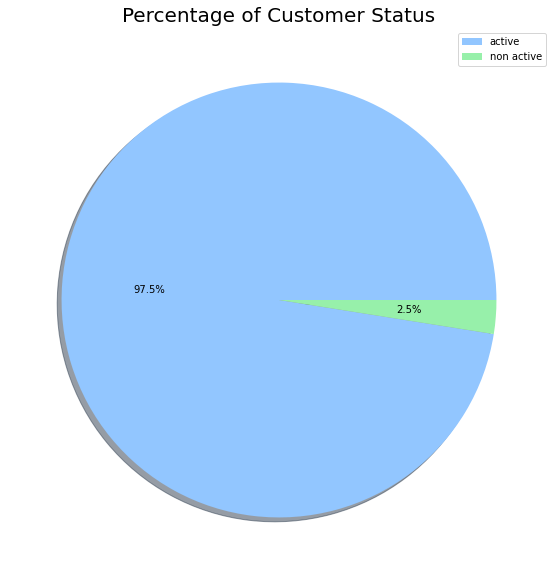

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,10))
plt.pie(df['notes'].value_counts().values,
autopct='%.1f%%', shadow=True)
plt.title('Percentage of Customer Status', size=20)
plt.legend(df['notes'].unique())
plt.show()

Meskipun jumlah persentase customer aktif masih terbilang cukup besar daripada customer yang tidak aktif. Tentu ini bisa menjadi permasalahan bisnis jika ingin mendapatkan keuntungan yang lebih dari saat ini karena semakin banyaknya customer yang aktif maka semakin banyak pula transaksi yang dihasilkan. Untuk mengurangi jumlah customer tidak aktif tersebut kita perlu mengetahui terlebih dahulu history transaksi dari customer tersebut. Ada berbagai kemungkinan mengapa customer tersebut tidak lagi aktif seperti cost yang terlalu besar karena lokasi toko yang mungkin jauh dari negara customer tersebut, biaya rental yang terlalu mahal, film yang kurang menarik, dan masih banyak berbagai kemungkinan lainnya. Selanjutnya kita akan analisis lebih lanjut lagi karena hanya dengan visualisasi ini saja masih dirasa kurang untuk dapat menemukan strategi yang tepat agar dapat memperoleh keuntungan yang lebih saat ini dengan kerugian yang minim.

## Top 10 Negara Dengan Jumlah Customer Terbanyak

In [38]:
%%HTML
<div class='tableauPlaceholder' id='viz1648704328570' style='position: relative'>
<noscript><a href='#'>
<img alt='TOP 10 COUNTRIES WITH THE MOST CUSTOMERS ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pu&#47;Purwa&#47;Top10TotalCustomers&#47;1_rss.png' style='border: none' />
</a>
</noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Purwa&#47;Top10TotalCustomers' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pu&#47;Purwa&#47;Top10TotalCustomers&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
<param name='filter' value='publish=yes' />
</object>
</div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1648704328570');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

Sebelumnya kita telah mengetahui jumlah persentase perbandingan antara customer yang aktif dengan yang tidak aktif, selanjutnya kita akan melihat negara mana saja yang memiliki jumlah customer terbanyak. Dapat kita lihat bahwa India menempati posisi teratas dan disusul oleh China dengan selisih yang tidak terlalu jauh. Hal ini dapat dijadikan acuan untuk pemilik toko agar dapat melakukan penerapan strategi yang tepat sasaran. Hanya dengan acuan ini mungkin pemilik toko dapat langsung menemukan sasaran kepada siapakah atau dimanakah seharusnya strategi ini diterapkan. Tapi, untuk meminimalkan kerugian mungkin kita perlu ulik lebih dalam lagi. 

## Top 10 Total Transaksi Customer Berdasarkan Negaranya

In [21]:
%%HTML
<div class='tableauPlaceholder' id='viz1648196752302' style='position: relative'>
<noscript>
<a href='#'>
<img alt='TOP 10 TOTAL TRANSACTIONS BY COUNTRY ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TotalTransaction&#47;Sheet2&#47;1_rss.png' style='border: none' />
</a>
</noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='TotalTransaction&#47;Sheet2' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TotalTransaction&#47;Sheet2&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1648196752302');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

Sebelumnya kita sudah mengumpulkan satu bukti terkait jumlah customer terbanyak berdasarkan negaranya dan sekarang kita ingin menambahkan bukti lain untuk menguatkan kepada siapakah strategi akan diterapkan. Terlihat bahwa lagi-lagi India menempati posisi teratas berdasarkan total transaksi dengan jumlah persentase 18% dari total keseluruhan transaksi di berbagai negara lalu diikuti China dengan jumlah persentase 17% dari total keseluruhan transaksi. Dengan hasil visualisasi yang sudah didapatkan, pemilik toko seharusnya sudah mendapatkan gambaran dan mengambil langkah tegas.

Strategi nyata yang kemungkinan bisa diterapkan oleh pemilik toko. antara lain:
1. Mendirikan toko cabang yang ketiga di India
2. Mengadakan event atau promo khusus customer yang berada di India

Dengan strategi tersebut diharapkan dapat meningkatkan jumlah customer ataupun mendapatkan customer baru dengan begitu jumlah transaksi juga akan bertambah sehingga akan menghasilkan keuntungan yang lebih dari sebelumnya.

## Total Customer Non Active

In [37]:
%%HTML
<div class='tableauPlaceholder' id='viz1648704037666' style='position: relative'>
<noscript>
<a href='#'>
<img alt='Total Customer Non Active ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cu&#47;CustomerNonActive&#47;Sheet1&#47;1_rss.png' style='border: none' />
</a>
</noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='CustomerNonActive&#47;Sheet1' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cu&#47;CustomerNonActive&#47;Sheet1&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
<param name='filter' value='publish=yes' />
</object>
</div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1648704037666');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

Selanjutnya, kita ingin mengetahui persebaran customer yang tidak aktif sebenarnya berasal dari negara mana saja. Berdasarkan hasil visualisasi diatas, kita dapati India dan China memiliki jumlah customer tidak aktif terbanyak dengan jumlah yang terbilang sama. Bukti tambahan ini semakin menguatkan kita bahwa pemilik toko harus memfokuskan permasalahannya pada kedua negara tersebut. Jika strategi yang dilakukannya tepat, maka besar kemungkinan akan mengurangi jumlah customer yang tidak aktif sehingga toko pun dapat berkembang.

## Perbedaan Total Bill Tiap Customer

In [23]:
# Uji perbandingan nilai total_bill berdasarkan status customer (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(df['total_bill'])

if pval < 0.05 :
    print ('Tolak Ho Karena P-Value ({} < 5%)'.format(pval))
    print ('Data Tidak Berdistribusi Normal')
else :
    print ('Gagal Tolak Ho Karena P-Value ({} > 5%)'.format(pval))
    print ('Data Berdistribusi Normal')

Tolak Ho Karena P-Value (3.857468982459977e-06 < 5%)
Data Tidak Berdistribusi Normal


Ho : Nilai median total bill customer aktif = Nilai median total bill customer non aktif

Ha : Nilai median total bill customer aktif < Nilai median total bill customer non aktif

In [24]:
# Uji perbandingan nilai total_bill berdasarkan status customer (Mann Whitney)

from scipy.stats import mannwhitneyu

result = list(mannwhitneyu(
    df[df['notes'] == 'active']['total_bill'],
    df[df['notes'] == 'non active']['total_bill'],
    alternative = 'greater'
))

print('U-Statistics:', result[0])
print('P-Value:', result[1])

if result[1]/2 < 0.05 :
    print ('\nTolak Ho Karena P-Value ({} < 5%)'.format(result[1]))
    print ('Terdapat Perbedaan Nilai Median Total Bill pada Setiap Customer')
else :
    print ('\nGagal Tolak Ho Karena P-Value ({} > 5%)'.format(result[1]))
    print ('Tidak Terdapat Perbedaan Nilai Median Total Bill pada Setiap Customer')

U-Statistics: 4415.5
P-Value: 0.47891175051939877

Gagal Tolak Ho Karena P-Value (0.47891175051939877 > 5%)
Tidak Terdapat Perbedaan Nilai Median Total Bill pada Setiap Customer


In [25]:
df[['total_bill', 'notes']].groupby('notes').median()

,total_bill
notes,
active,110.725
non active,116.690


**notes** : Meskipun terdapat nilai selisih, akan tetapi selisih ini tidak dianggap signifikan oleh sistem.

Ho : Jumlah rata-rata total bill customer active = Jumlah rata-rata total bill customer non active

Ha : Jumlah rata-rata total bill customer active > Jumlah rata-rata total bill customer non active

In [26]:
# Uji perbandingan rata-rata total_bill berdasarkan status customer

# Import Library
from scipy.stats import ttest_ind

result = list(ttest_ind(
    df[df['notes'] == 'active']['total_bill'],
    df[df['notes'] == 'non active']['total_bill'],
    equal_var=False
))

print('T-Statistics', result[0])
print('P-Value', result[1]/2)

# Conclusion
if result[1]/2 < 0.05:
    print('\nTolak Ho')
    print('Terdapat perbedaan selisih rata-rata total bill antara customer aktif dengan customer non aktif')
else:
    print('\nGagal Tolak Ho')
    print('Tidak ada perbedaan selisih rata-rata total bill antara customer aktif dengan customer non aktif')

T-Statistics 0.2744103761074349
P-Value 0.39378761035246307

Gagal Tolak Ho
Tidak ada perbedaan selisih rata-rata total bill antara customer aktif dengan customer non aktif


In [27]:
df[['total_bill', 'notes']].groupby('notes').mean()

,total_bill
notes,
active,112.593425
non active,110.796667


**notes** : Meskipun terdapat nilai selisih, akan tetapi selisih ini tidak dianggap signifikan oleh sistem.

## Perbedaan Total Transaksi Tiap Customer

In [28]:
norm, pval = shapiro(df['total_transaction'])

if pval < 0.05 :
    print ('Tolak Ho Karena P-Value ({} < 5%)'.format(pval))
    print ('Data Tidak Berdistribusi Normal')
else :
    print ('Gagal Tolak Ho Karena P-Value ({} > 5%)'.format(pval))
    print ('Data Berdistribusi Normal')

Tolak Ho Karena P-Value (0.0020590145140886307 < 5%)
Data Tidak Berdistribusi Normal


Ho : Nilai median total transaksi customer aktif = Nilai median total transaksi customer non aktif

Ha : Nilai median total transaksi customer aktif > Nilai median total transaksi customer non aktif

In [29]:
result = list(mannwhitneyu(
    df[df['notes'] == 'active']['total_transaction'],
    df[df['notes'] == 'non active']['total_transaction'],
    alternative = 'greater'
))

print('U-Statistics:', result[0])
print('P-Value:', result[1])

if result[1]/2 < 0.05 :
    print ('\nTolak Ho Karena P-Value ({} < 5%)'.format(result[1]))
    print ('Terdapat Perbedaan Nilai Median Total Transaction pada Setiap Customer')
else :
    print ('\nGagal Tolak Ho Karena P-Value ({} > 5%)'.format(result[1]))
    print ('Tidak Terdapat Perbedaan Nilai Median Total Transaction pada Setiap Customer')

U-Statistics: 4089.0
P-Value: 0.6705034137114775

Gagal Tolak Ho Karena P-Value (0.6705034137114775 > 5%)
Tidak Terdapat Perbedaan Nilai Median Total Transaction pada Setiap Customer


In [30]:
df[['total_transaction', 'notes']].groupby('notes').median()

,total_transaction
notes,
active,26.0
non active,28.0


**notes** : Meskipun terdapat nilai selisih, akan tetapi selisih ini tidak dianggap signifikan oleh sistem.

Ho : Rata-rata total transaksi customer aktif = Rata-rata total transaksi customer non aktif

Ha : Rata-rata total transaksi customer aktif > Rata-rata total transaksi customer non aktif

In [39]:
result = list(ttest_ind(
    df[df['notes'] == 'active']['total_transaction'],
    df[df['notes'] == 'non active']['total_transaction'],
    equal_var=False
))

print('T-Statistics', result[0])
print('P-Value', result[1]/2)

# Conclusion
if result[1]/2 < 0.05:
    print('Tolak Ho')
    print('Terdapat perbedaan selisih rata-rata total transaction antara customer aktif dengan customer non aktif')
else:
    print('Gagal Tolak Ho')
    print('Tidak ada perbedaan selisih rata-rata total transaction antara customer aktif dengan customer non aktif')

T-Statistics -0.09822579333418398
P-Value 0.4615475979677237
Gagal Tolak Ho
Tidak ada perbedaan selisih rata-rata total transaction antara customer aktif dengan customer non aktif


In [32]:
df[['total_transaction', 'notes']].groupby('notes').mean()

,total_transaction
notes,
active,26.780822
non active,26.933333


**notes** : Meskipun terdapat nilai selisih, akan tetapi selisih ini tidak dianggap signifikan oleh sistem.

## Hubungan Total Transaksi Dan Total Beli

<AxesSubplot:>

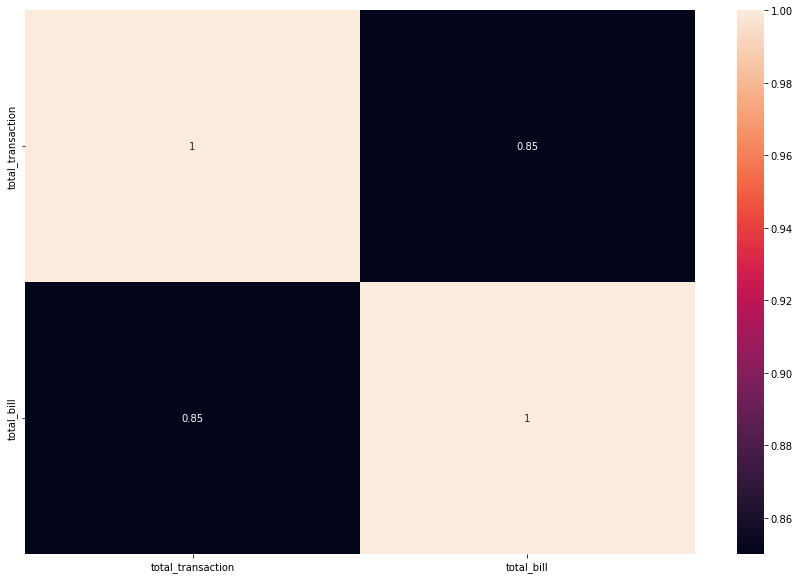

In [33]:
# Korelasi

plt.figure(figsize=(15,10))
sns.heatmap(df[['total_transaction', 'total_bill']].corr('spearman'), annot=True)

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_transaction', ylabel='total_bill'>

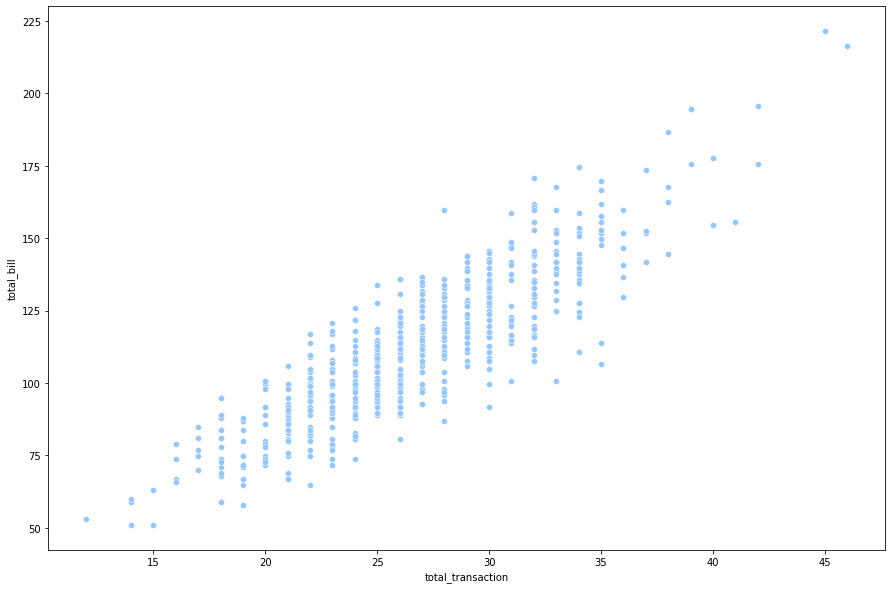

In [41]:
# Korelasi pada scatter plot

plt.figure(figsize=(15,10))
sns.scatterplot(df['total_transaction'], df['total_bill'])